In [64]:
# 連接elasticsearch資料庫

import json
import pandas as pd
from elasticsearch import Elasticsearch

es = Elasticsearch('localhost:9200')
print json.dumps(es.info(),indent=2)

INFO:elasticsearch:GET http://localhost:9200/ [status:200 request:0.115s]


{
  "status": 200, 
  "cluster_name": "TwitterDB", 
  "version": {
    "lucene_version": "4.10.2", 
    "build_hash": "927caff6f05403e936c20bf4529f144f0c89fd8c", 
    "number": "1.4.2", 
    "build_timestamp": "2014-12-16T14:11:12Z", 
    "build_snapshot": false
  }, 
  "name": "Machine1", 
  "tagline": "You Know, for Search"
}


In [57]:
# 共計有多少Twitter參與這類關鍵字議題討論

response = es.search(
    index="twitter2",
    body={
        "query": {
            "term": {
                "text": "exploit"
            }
        },  
        "size": 0,
        "aggs": {
            "name":{
                "terms": {
                    "field": "tweet.uid",
                    "size": 0
                }
            }
        }
    }
)

# print json.dumps(response,indent=2) 

# print response['aggregations']['name']['buckets']

# for user in response['aggregations']['user']['buckets']:
#    print str(user['doc_count']) + "\t" + user['key'] 

INFO:elasticsearch:GET http://localhost:9200/twitter2/_search [status:200 request:0.004s]


In [63]:
df=pd.read_json(json.dumps(response['aggregations']['name']['buckets']))
output = df[["doc_count","key"]]
print(output)
print (output.rows)
# print "參與exploit討論的Twitter人數為："+

     doc_count                 key
0          179           405658492
1          172  608741689721671681
2          160  617877508403384320
3          147            18983429
4          112           118059149
5           99            43130563
6           95  618514735546396673
7           76           390189754
8           68            18789893
9           66  619212635100286977
10          61             8236572
11          61            18252252
12          58  605294389297094656
13          56  588352148389269505
14          55  619537549397245952
15          54            18476766
16          54            19206209
17          51  592662789136744448
18          48            14293266
19          48            15589731
20          48            97450156
21          47            11791512
22          39            13275122
23          39            14277681
24          39           297856522
25          39  619291214764994560
26          36  603329449388429312
27          35      

AttributeError: 'DataFrame' object has no attribute 'rows'

In [134]:
response = es.search(
    index="twitter2",
    body={
        "query": {
            "term": {
                "text": "exploit"
            }
        },  
        "size": 0,
        "aggs": {
            "name":{
                "terms": {
                    "field": "tweet.uid"
                }
            }
        }
    }
)

print json.dumps(response,indent=2)
# print 

# for user in response['aggregations']['user']['buckets']:
#    print str(user['doc_count']) + "\t" + user['key'] 

{
  "hits": {
    "hits": [], 
    "total": 3853, 
    "max_score": 0.0
  }, 
  "_shards": {
    "successful": 5, 
    "failed": 0, 
    "total": 5
  }, 
  "took": 9, 
  "aggregations": {
    "name": {
      "buckets": [
        {
          "key": 405658492, 
          "doc_count": 179
        }, 
        {
          "key": 608741689721671681, 
          "doc_count": 172
        }, 
        {
          "key": 617877508403384320, 
          "doc_count": 160
        }, 
        {
          "key": 18983429, 
          "doc_count": 147
        }, 
        {
          "key": 118059149, 
          "doc_count": 112
        }, 
        {
          "key": 43130563, 
          "doc_count": 99
        }, 
        {
          "key": 618514735546396673, 
          "doc_count": 95
        }, 
        {
          "key": 390189754, 
          "doc_count": 76
        }, 
        {
          "key": 18789893, 
          "doc_count": 68
        }, 
        {
          "key": 619212635100286977, 
         

In [33]:
response = es.search(
    index="twitter2",
    body={
        "query": {
            "term": {
                "text": "exploit"
            }
        },  
        "size": 0,
        "aggs": {
            "time": {
                "date_histogram": {
                    "field": "tweet.created_at",
                    "interval": "month"    
                },
                "aggs": {
                    "name":{
                        "terms": {
                            "field": "tweet.uid"
                        }
                    }
                }
            }
        }
    }
)
for tweet in response['hits']['hits']:
   print tweet['_source']['user']
   print tweet['_source']['message']
#    print tweet['_source']['@timestamp']
   print "\n"


INFO:elasticsearch:GET http://localhost:9200/twitter2/_search [status:200 request:0.012s]


INFO:elasticsearch:GET http://localhost:9200/twitter2/_search [status:200 request:0.014s]


{
  "hits": {
    "hits": [], 
    "total": 3853, 
    "max_score": 0.0
  }, 
  "_shards": {
    "successful": 5, 
    "failed": 0, 
    "total": 5
  }, 
  "took": 10, 
  "aggregations": {
    "time": {
      "buckets": [
        {
          "name": {
            "buckets": [
              {
                "key": 14244412, 
                "doc_count": 1
              }
            ], 
            "sum_other_doc_count": 0, 
            "doc_count_error_upper_bound": 0
          }, 
          "key_as_string": "Tue Apr 01 00:00:00 +0000 2008", 
          "key": 1207008000000, 
          "doc_count": 1
        }, 
        {
          "name": {
            "buckets": [
              {
                "key": 14244412, 
                "doc_count": 1
              }, 
              {
                "key": 15637093, 
                "doc_count": 1
              }
            ], 
            "sum_other_doc_count": 0, 
            "doc_count_error_upper_bound": 0
          }, 
          "key_

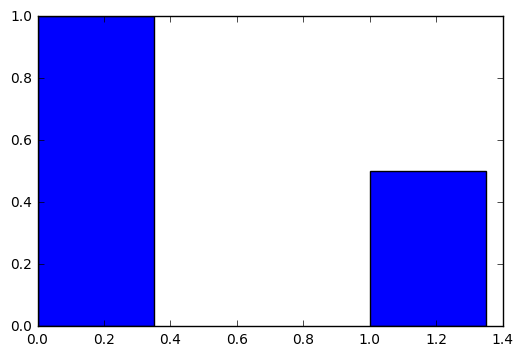

In [45]:
response = es.search(
    index="twitter2",
    body={
        "query": {
            "term": {
                "text": "exploit"
            }
        },  
        "size": 0,
        "aggs": {
            "time": {
                "date_histogram": {
                    "field": "tweet.created_at",
                    "interval": "month"    
                },
                "aggs": {
                    "name":{
                        "terms": {
                            "field": "tweet.uid"
                        }
                    }
                }
            }
        },
        "size": 0,
    }
)

print json.dumps(response,indent=2)

for user in response['aggregations']['time']['buckets']:
   print str(user['doc_count']) + "\t" + str(user['key']) 


plt.bar(left = (0,1),height = (1,0.5),width = 0.35)
plt.show()


In [20]:
import numpy as np
import pandas as pd

from bokeh.plotting import figure, show, output_file

# generate some synthetic time series for six different categories
cats = list("abcdef")
yy = np.random.randn(2000)
g = np.random.choice(cats, 2000)
for i, l in enumerate(cats):
    yy[g == l] += i // 2
df = pd.DataFrame(dict(score=yy, group=g))

# find the quartiles and IQR for each category
groups = df.groupby('group')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.score > upper.loc[cat]['score']) | (group.score < lower.loc[cat]['score'])]['score']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = []
    outy = []
    for cat in cats:
        # only add outliers if they exist
        if not out.loc[cat].empty:
            for value in out[cat]:
                outx.append(cat)
                outy.append(value)

p = figure(tools="save", background_fill_color="#EFE8E2", title="", x_range=cats)

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.score = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'score']),upper.score)]
lower.score = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'score']),lower.score)]

# stems
p.segment(cats, upper.score, cats, q3.score, line_width=2, line_color="black")
p.segment(cats, lower.score, cats, q1.score, line_width=2, line_color="black")

# boxes
p.rect(cats, (q3.score+q2.score)/2, 0.7, q3.score-q2.score,
    fill_color="#E08E79", line_width=2, line_color="black")
p.rect(cats, (q2.score+q1.score)/2, 0.7, q2.score-q1.score,
    fill_color="#3B8686", line_width=2, line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p.rect(cats, lower.score, 0.2, 0.01, line_color="black")
p.rect(cats, upper.score, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="12pt"

output_file("boxplot.html", title="boxplot.py example")

show(p)

INFO:bokeh.core.state:Session output file 'boxplot.html' already exists, will be overwritten.
